In [65]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [66]:
data = pd.read_csv('UberDataset.csv')

In [67]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [68]:
data.shape

(1156, 7)

In [69]:
data.info

<bound method DataFrame.info of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1

In [70]:
data['PURPOSE'].fillna('NOT', inplace=True)

C:\Users\abhir\AppData\Local\Temp\ipykernel_19520\3915608489.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE'].fillna('NOT', inplace=True)


In [71]:
data.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [72]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')

In [73]:
data['date'] = pd.DatetimeIndex(data['START_DATE']).date
data['time'] = pd.DatetimeIndex(data['END_DATE']).hour

data['day-night'] = pd.cut(x =data['time'], bins = [0,10,15,19,24], labels= ['Morning', 'Afternoon', 'Evening', 'Night'])


In [74]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,15.0,Afternoon


In [75]:
data.dropna(inplace=True)

In [76]:
data.drop_duplicates(inplace=True)

In [77]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,15.0,Afternoon


In [78]:
data.shape

(406, 10)

<Axes: xlabel='count', ylabel='PURPOSE'>

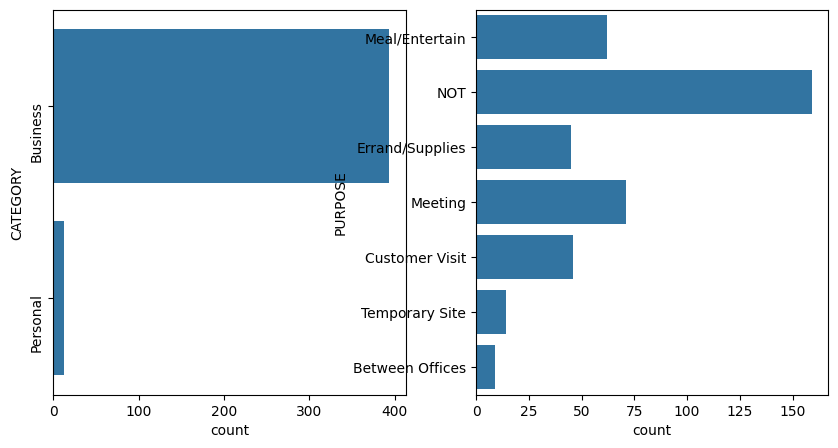

In [79]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data['CATEGORY'])
plt.yticks(rotation = 90)

plt.subplot(1,2,2)
sns.countplot(data['PURPOSE'])



<Axes: xlabel='count', ylabel='day-night'>

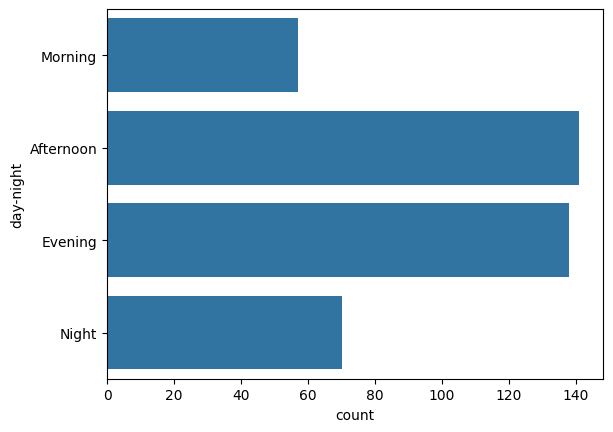

In [80]:
sns.countplot(data['day-night'])


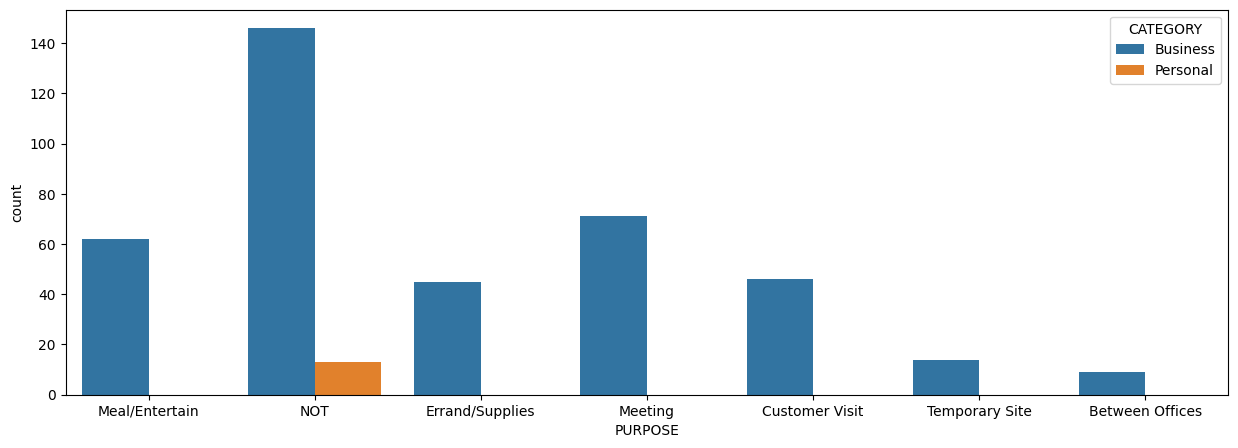

In [81]:
plt.figure(figsize=(15,5))
sns.countplot(data= data, x = 'PURPOSE', hue= 'CATEGORY')
plt.show()

In [82]:
from sklearn.preprocessing import OneHotEncoder

cols = ['CATEGORY', 'PURPOSE']
OH = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols = pd.DataFrame(OH.fit_transform(data[cols]))
OH_cols.index = data.index
OH_cols.columns = OH.get_feature_names_out()
df = data.drop(cols, axis=1)
data = pd.concat([df,OH_cols], axis=1)

<Axes: >

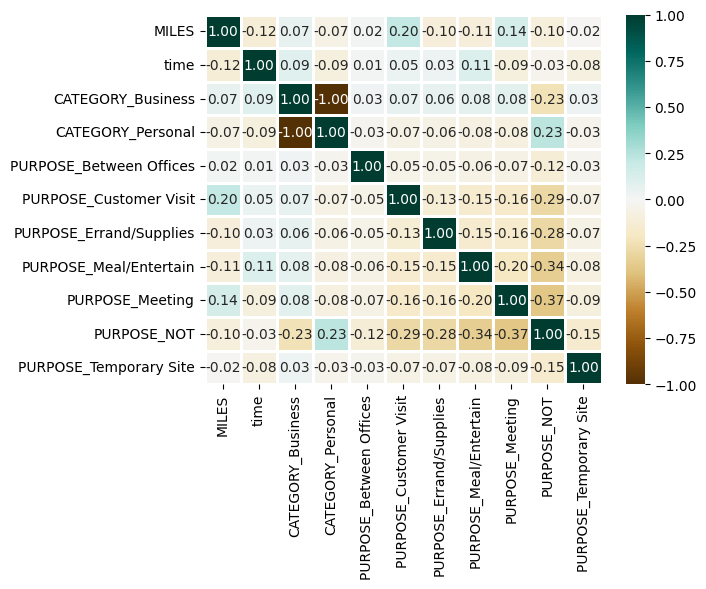

In [83]:
num_data = data.select_dtypes(include=['number'])

sns.heatmap(num_data.corr(), cmap='BrBG', fmt='.2f', linewidths=2, annot=True)


[Text(0.5, 0, 'Months'), Text(0, 0.5, 'Value Counts')]

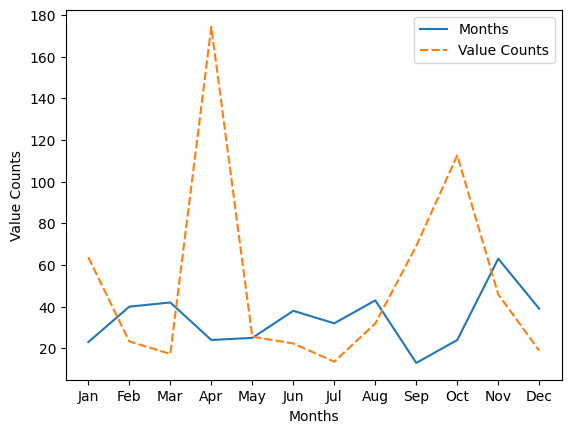

In [84]:
data['Month'] = pd.DatetimeIndex(data['START_DATE']).month
month_label = {1.0 : 'Jan', 2.0 : 'Feb', 3.0 : 'Mar', 4.0 : 'Apr', 
               5.0 : 'May', 6.0 : 'Jun', 7.0 : 'Jul', 8.0 : 'Aug',
               9.0 : 'Sep', 10.0 : 'Oct', 11.0 : 'Nov', 12.0 : 'Dec'}

data['Month'] = data.Month.map(month_label)

mon = data.Month.value_counts(sort=False)

df = pd.DataFrame({"Months" : mon.values, 
                  "Value Counts" : data.groupby('Month', sort=False)['MILES'].max()})

p = sns.lineplot(data = df)
p.set(xlabel = 'Months', ylabel = 'Value Counts')


In [85]:
data['Day'] = data.START_DATE.dt.weekday
day_label = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

data['Day'] = data['Day'].map(day_label)

Text(0, 0.5, 'Count')

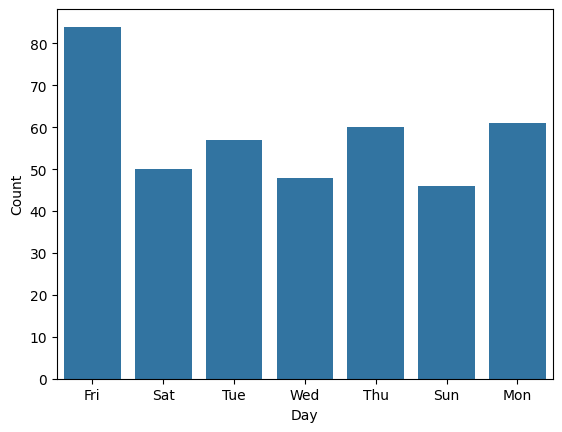

In [86]:
day_label = data.Day.value_counts(sort=False)
sns.barplot(x=day_label.index, y=day_label)
plt.xlabel('Day')
plt.ylabel('Count')


<Axes: ylabel='MILES'>

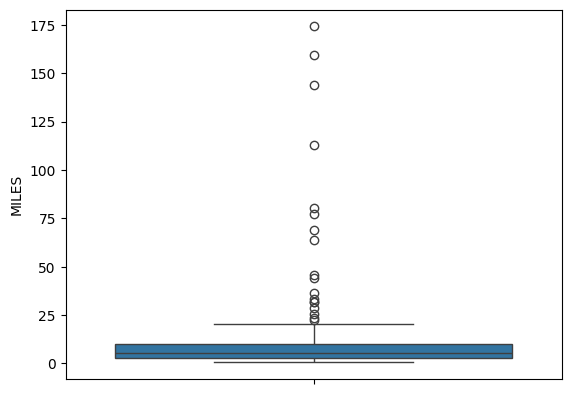

In [89]:
sns.boxplot(data['MILES'])

<Axes: ylabel='MILES'>

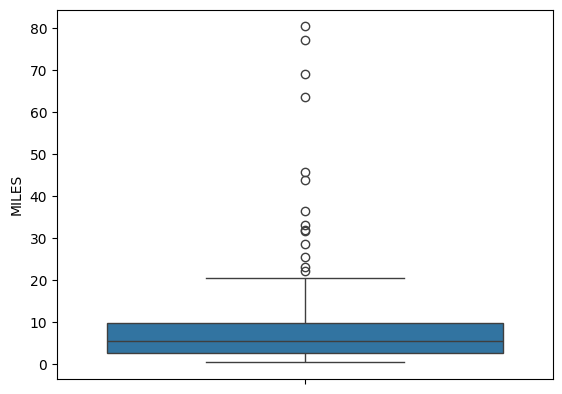

In [91]:
sns.boxplot(data[data['MILES']<100]['MILES'])

C:\Users\abhir\AppData\Local\Temp\ipykernel_19520\1450821616.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

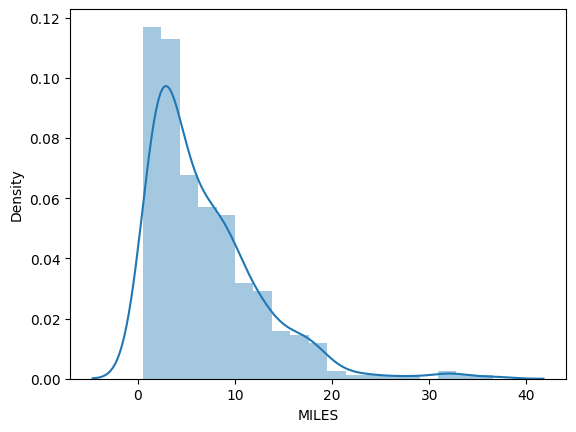

In [94]:
sns.distplot(data[data['MILES']<40]['MILES'])